In [1]:
from pref_voting.profiles_with_ties import *
from pref_voting.voting_methods import *
from pref_voting.analysis import *
from pref_voting.generate_profiles import *
from pref_voting.generate_weighted_majority_graphs import *

from pref_voting.utility_profiles import UtilityProfile

from pref_voting.generate_utility_profiles import *
from pref_voting.generate_utility_profiles import *
from pref_voting.utility_methods import *

from pref_voting.spatial_profiles import SpatialProfile
from pref_voting.generate_spatial_profiles import *
from pref_voting.utility_functions import *
from pref_voting.probabilistic_methods import *
from tqdm.notebook import tqdm
import nashpy as nash
import numpy as np
import random2 as random
from pref_voting.mappings import _Mapping
from multiprocess import Pool, cpu_count, current_process
from numba import njit, float32
import pickle

In [36]:
def test(i): 
    #np.random.seed(0)
    return np.random.random()

pool = Pool(4)

xs = pool.map(test, range(8))

In [37]:
print(xs)

[0.7100797827251619, 0.7100797827251619, 0.7100797827251619, 0.7100797827251619, 0.22026951876358836, 0.9445414390076033, 0.19872137706119275, 0.22026951876358836]


In [38]:
print(len(xs) == len(list(set(xs))))

False


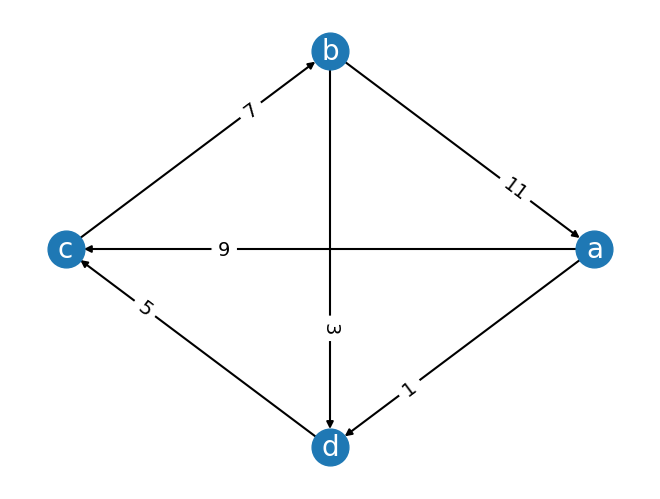

Copeland winners are {a, b}
Minimax winner is {d}
Beat Path winner is {d}
Ranked Pairs winner is {b}
Split Cycle winners are {b, d}


In [5]:
a=0
b=1
c=2
d=3
mg = MarginGraph(
    [a,b,c,d],
    [
        (a,d,1),
        (a,c,9),
        (b,d,3),
        (b,a,11),
        (c,b,7),
        (d,c,5)
    ],
    cmap={a:"a",b:"b", c:'c', d:'d'}
)
mg.display()
copeland.display(mg)
minimax.display(mg)
beat_path.display(mg)
ranked_pairs.display(mg)
split_cycle.display(mg)

+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| a | b | a | a |
| b | c | b | b |
| c | d | c | d |
| d | a | d | c |
+---+---+---+---+


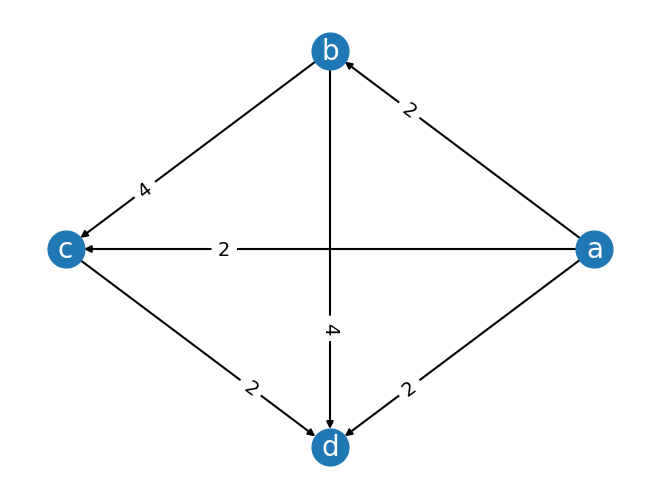

In [7]:
prof = Profile(
    [
        [a,b,c,d],
        [b,c,d,a],
        [a,b,c,d],
        [a,b,d,c]

    ],
    cmap={a:"a",b:"b", c:'c', d:'d'}
)
prof.display()
prof.display_margin_graph()

+---+---+---+---+
| 1 | 1 | 1 | 1 |
+---+---+---+---+
| a | b | c | d |
| b | c | d | a |
| c | d | a | b |
| d | a | b | c |
+---+---+---+---+


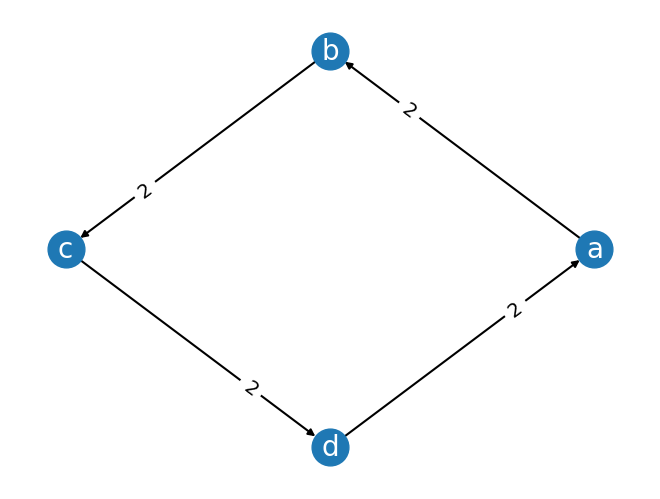

In [8]:
prof = Profile(
    [
        [a,b,c,d],
        [b,c,d,a],
        [c,d,a,b],
        [d,a,b,c]

    ],
    cmap={a:"a",b:"b", c:'c', d:'d'}
)
prof.display()
prof.display_margin_graph()

+---+---+---+---+---+
| 2 | 1 | 3 | 2 | 1 |
+---+---+---+---+---+
| b | d | a | d | d |
| a | b | c | c | c |
| d | a | b | b | b |
| c | c | d | a | a |
+---+---+---+---+---+


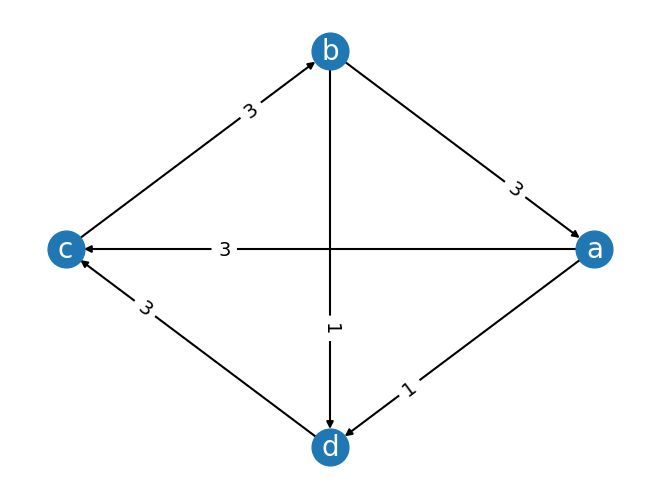

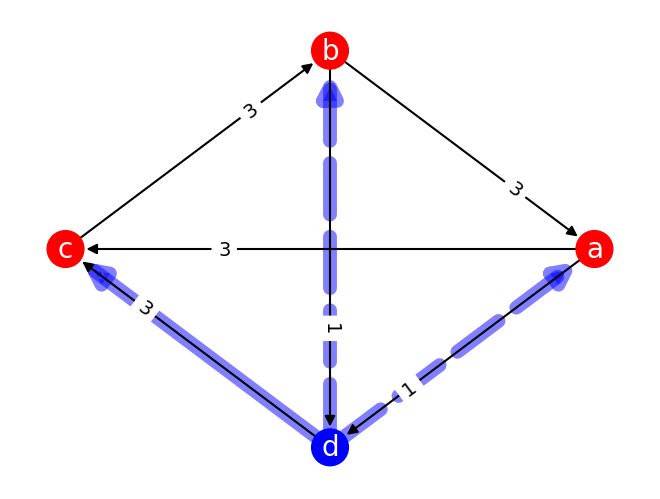

In [11]:
prof = Profile(
    [
        [b, a,d , c],
        [d, b, a, c],
        [a, c, b, d],
        [d, c, b, a], 
        [d, c, b, a]

    ],
    rcounts=[2, 1, 3, 2, 1],
    cmap={a:"a",b:"b", c:'c', d:'d'}
)
prof.display()
prof.display_margin_graph()
mg = prof.margin_graph()

mg.display_with_defeat(beat_path_defeat(mg))

+---+---+---+---+---+
| 2 | 1 | 3 | 2 | 1 |
+---+---+---+---+---+
| b | d | a | d | d |
| a | b | c | c | b |
| d | a | b | b | c |
| c | c | d | a | a |
+---+---+---+---+---+


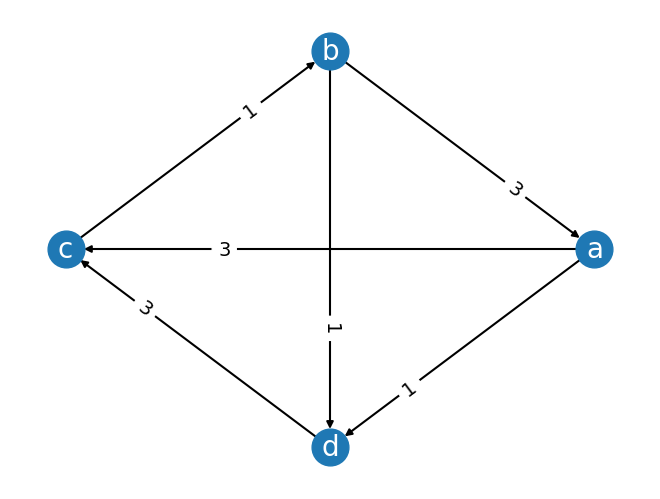

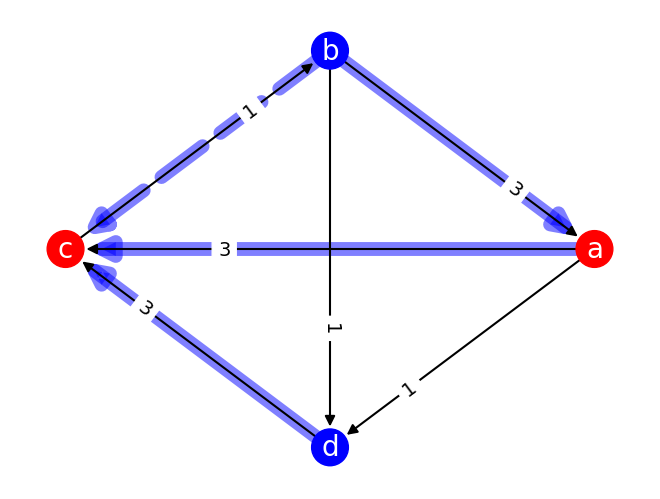

In [12]:
prof = Profile(
    [
        [b, a,d , c],
        [d, b, a, c],
        [a, c, b, d],
        [d, c, b, a], 
        [d, b, c, a]

    ],
    rcounts=[2, 1, 3, 2, 1],
    cmap={a:"a",b:"b", c:'c', d:'d'}
)
prof.display()
prof.display_margin_graph()
mg = prof.margin_graph()

mg.display_with_defeat(beat_path_defeat(mg))

+---+---+---+
| 2 | 1 | 1 |
+---+---+---+
| e | c | a |
| c | b | d |
| b | a | b |
| a | d | e |
| d | e | c |
+---+---+---+


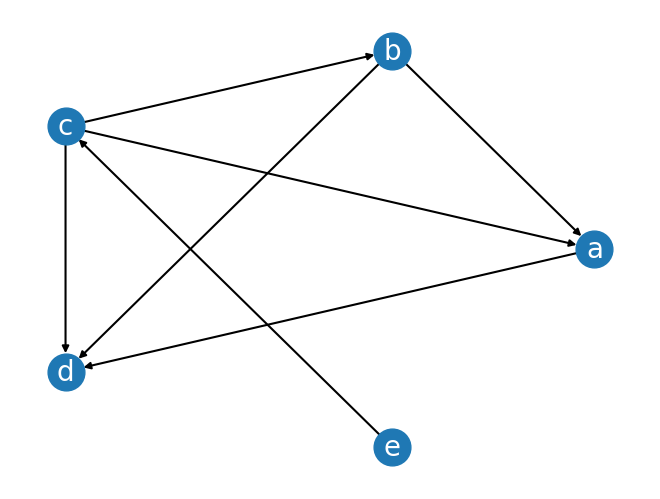

Copeland winner is {c}


In [16]:
e=4
prof = Profile(
    [
        [e, c, b, a, d],
        [c, b, a, d, e],
        [a, d, b, e, c]
    ],
         

    rcounts=[2, 1, 1],
    cmap={a:"a",b:"b", c:'c', d:'d',e:'e'}
)
prof.display()
maj_graph = prof.majority_graph()
maj_graph.display()
copeland.display(prof)

+---+---+---+---+
| 2 | 1 | 1 | 1 |
+---+---+---+---+
| e | c | a | c |
| c | b | d | e |
| b | a | b | d |
| a | d | e | b |
| d | e | c | a |
+---+---+---+---+


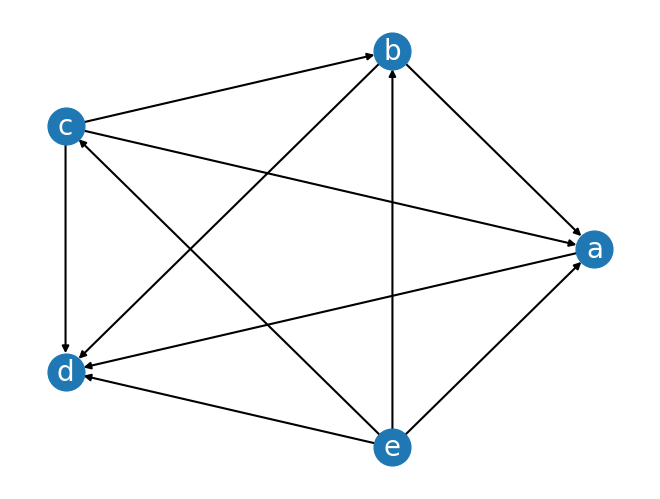

Copeland winner is {e}


In [17]:
e=4
prof = Profile(
    [
        [e, c, b, a, d],
        [c, b, a, d, e],
        [a, d, b, e, c],
        [c, e, d, b, a]
    ],
         

    rcounts=[2, 1, 1, 1],
    cmap={a:"a",b:"b", c:'c', d:'d',e:'e'}
)
prof.display()
maj_graph = prof.majority_graph()
maj_graph.display()
copeland.display(prof)

In [ ]:
e=4
prof = Profile(
    [
        [e, c, b, a, d],
        [c, b, a, d, e],
        [a, d, b, e, c],
        [c, e, d, b, a]
    ],
         

    rcounts=[2, 1, 1, 1],
    cmap={a:"a",b:"b", c:'c', d:'d',e:'e'}
)
prof.display()
maj_graph = prof.majority_graph()
maj_graph.display()
copeland.display(prof)

In [8]:
m = _Mapping({0:1, 1:2}, val_map = {1:"A", 2:"B"})

print(m)

pickle.dump(m, open("mapping.p", "wb"))

0:A, 1:B


In [ ]:
for i in range(100):
    print(np.random.choice([0, 1, 2], size=10))

In [ ]:
print(10)

In [ ]:

cand_cov = np.array([[0.5, 0.0], [0.0, 0.5]])
voter_cov  = np.array([[0.5, 0.0], [0.0, 0.5]])
sprof = generate_spatial_profile_polarized_cands_randomly_polarized_voters(
    [
        (np.array([0.0, 0.0]), cand_cov, 2), 
        (np.array([1.0, 1.0]), cand_cov, 2), 
        (np.array([-1.0, -1.0]), cand_cov, 2)], 
    1000,
    [
        (np.array([-1.0, -1.0]), voter_cov, 0.0), 
        (np.array([1.0, 1.0]), voter_cov, 0.0), 
        (np.array([0.0, 0.0]), voter_cov, 1.0)]
)

sprof.view()

In [ ]:
prof = Profile([[0,1], [0,1]])
prof.display()
plurality_with_runoff_put.display(prof)

In [ ]:
cond_eff_df = condorcet_efficiency_data([bracket_voting], num_trials = 100, numbers_of_candidates=[4, 5], numbers_of_voters=[1001], probmods = ["Spatial"], use_parallel=True)

cond_eff_df

In [ ]:
prof = generate_profile(3, 4, "Spatial", (3, quadratic_utility))

prof.display()

In [ ]:
data_for_df = {
    "probmod_param": [(2, None), (3, quadratic_utility)]
}

df = pd.DataFrame(data_for_df)

df

In [ ]:
prof = generate_profile(3, 10)

prof.plurality_scores([0])

In [ ]:
prof = generate_truncated_profile(4, 5)
prof.display()

print([r for r in prof.rankings_as_dicts_counts])

In [ ]:
prof = generate_profile(3, 5, probmod="MALLOWS", probmod_param=0.8)
prof.display()

In [ ]:
def generate_utility_profile_normal(num_candidates, num_voters, std = 0.1, normalize = None, num_profiles = 1):
    mean_utilities = {c: np.random.uniform(0, 1) for c in range(num_candidates)}
    print(mean_utilities)
    cand_utils = {c: np.random.normal(mean_utilities[c], std, size=(num_profiles, num_voters)) for c in range(num_candidates)} 
    
    print(cand_utils)
    if normalize == "range": 
        uprofs = [UtilityProfile([{c: cand_utils[c][pidx][vidx] 
                                   for c in range(num_candidates)} 
                                   for vidx in range(num_voters)]).normalize_by_range() 
                                   for pidx in range(num_profiles)]
    elif normalize == "score":
        uprofs = [UtilityProfile([{c: cand_utils[c][pidx][vidx] 
                                   for c in range(num_candidates)} 
                                   for vidx in range(num_voters)]).normalize_by_standard_score() 
                                   for pidx in range(num_profiles)]
    else: # do not normalize
        uprofs = [UtilityProfile([{c: cand_utils[c][pidx][vidx] 
                                   for c in range(num_candidates)} 
                                   for vidx in range(num_voters)]) 
                                   for pidx in range(num_profiles)]


    return uprofs if num_profiles > 1 else uprofs[0]


In [ ]:
uprofs = generate_utility_profile_normal(4, 5, num_profiles = 2)

for uprof in uprofs: 
    uprof.display()

In [ ]:
def generate_utility_profile_uniform2(num_candidates, num_voters, num_profiles = 1):
    """
    Generate a utility profile where each voter assigns a random number between 0 and 1 to each candidate.

    Args:   
        num_candidates (int): The number of candidates.
        num_voters (int): The number of voters.
    
    Returns:
        UtilityProfile: A utility profile.

    """

    cand_utils = np.random.uniform(size=(num_profiles, num_voters, num_candidates))

    uprofs = [UtilityProfile([{c: cand_utils[pidx][v][c] 
                               for c in range(num_candidates)} 
                               for v in range(num_voters)]) 
                               for pidx in range(num_profiles)]
    
    return uprofs if num_profiles > 1 else uprofs[0]


In [ ]:
%timeit np.random.uniform(size=(1000, 100, 10))

In [ ]:
%timeit [np.random.uniform(size=(1, 100, 10)) for _ in range(1000)]

In [ ]:
%timeit [generate_utility_profile_uniform2(10, 100) for _ in range(100)]

In [ ]:
%timeit generate_utility_profile_uniform2(10, 100, num_profiles = 100)

In [ ]:
uprofs = generate_utility_profile_uniform2(5, 4, num_profiles = 4)

for uprof in uprofs: 
    uprof.display()
    print()

In [ ]:
def np_norm(x: float32[:]):
    return np.linalg.norm(x)
 
@njit
def np_norm_jit(x: float32[:]):
    return np.linalg.norm(x)
 
@njit(float32(float32[:]), fastmath=True)
def np_norm_jit_full(x):
    return np.linalg.norm(x)

@njit
def linear_utility2(v_pos: float32[:], c_pos: float32[:]):
    """
    The utility of the voter for the candidate is negative of the difference in positions. 

    Args:   
        v_pos (numpy array): The position(s) of the voter.
        c_pos (numpy array): The position(s) of the candidate.  
    Returns:
        float: The utility of the candidate to the voter.
    """
    return -np.linalg.norm(v_pos - c_pos)


In [ ]:
%timeit linear_utility2(np.array([0.0, 1.0]), np.array([1.0, 1.0]))

In [ ]:
sprofs = generate_spatial_profile(5, 5, 3, num_profiles= 1000)


In [ ]:
%timeit [sprof.to_utility_profile(utility_function=linear_utility) for sprof in sprofs]

In [ ]:
%timeit [sprof.to_utility_profile(utility_function=linear_utility2) for sprof in sprofs]

In [ ]:
%timeit linear_utility(np.array([0.0, 1.0]), np.array([1.0, 1.0]))

In [ ]:
%timeit quadratic_utility(np.array([0, 1]), np.array([1, 1]))

In [ ]:
%timeit linear_utility(np.array([0, 1]), np.array([1, 1]))

In [ ]:
voter_mean = np.array([0,0])
voter_cov = np.eye(2)
num_voters = 3
num_profiles = 5
voter_sample1 = np.random.multivariate_normal(voter_mean, voter_cov, size=(num_profiles, num_voters))

voter_sample2 = np.random.multivariate_normal(voter_mean, voter_cov, size=(num_profiles, num_voters))

voter_sample3 = [list(voter_sample1[pidx]) + list(voter_sample2[pidx]) for pidx in range(num_profiles)]

for v in voter_sample3:
    print(v)
    print()


In [ ]:
def generate_spatial_profile_polarized2(cand_clusters, voter_clusters, num_profiles = 1):

    cand_samples = list()
    total_num_cands = 0
    for cand_cluster in cand_clusters:
        cand_mean, cand_cov, num_cands = cand_cluster
        total_num_cands += num_cands
        cluster_samples = np.random.multivariate_normal(cand_mean, cand_cov, 
                                                        size=(num_profiles,num_cands))
        if len(cand_samples) == 0:
            cand_samples = cluster_samples
        else:
            #cand_samples = [list(cand_samples[pidx]) + list(cluster_samples[pidx]) 
            #                for pidx in range(num_profiles)]
            cand_samples = np.concatenate([cand_samples, cluster_samples], axis=1)

    voter_samples = list()
    total_num_voters = 0
    for voter_cluster in voter_clusters:
        voter_mean, voter_cov, num_voters = voter_cluster
        total_num_voters += num_voters
        cluster_samples = np.random.multivariate_normal(voter_mean, voter_cov, 
                                                        size=(num_profiles,num_voters))
        if len(voter_samples) == 0:
            voter_samples = cluster_samples
        else:
            voter_samples = np.concatenate([voter_samples, cluster_samples], axis=1) 

    
    profs = [SpatialProfile({cidx: cand_samples[pidx][cidx]
                           for cidx in range(total_num_cands)},
                           {vidx: voter_samples[pidx][vidx]
                            for vidx in range(total_num_voters)}) 
                            for pidx in range(num_profiles)]
    
    return profs[0] if num_profiles == 1 else profs

In [ ]:
profs = generate_spatial_profile(5, 5, 3, num_profiles= 5)
for p in profs: 
    p.display()

In [ ]:
elections = np.concatenate([np.array([[[0,1], [0, 3]], [[2,1], [1, 3]]]), np.array([[[1,0], [1,1]], [[5,0], [1,5]]])], axis=1)

for e in elections: 
    print(e)
    print()

In [ ]:
cand_clusters = [((0,0), np.eye(2), 3), ((1,1), np.eye(2), 3)]
voter_clusters = [((0,0), np.eye(2), 3), ((1,1), np.eye(2), 3)]
prof = generate_spatial_profile_polarized(cand_clusters, voter_clusters)
prof2 = generate_spatial_profile_polarized2(cand_clusters, voter_clusters)
prof2.display()

In [ ]:
%timeit [generate_spatial_profile_polarized(cand_clusters, voter_clusters) for _ in range(1000)]

In [ ]:
%timeit generate_spatial_profile_polarized2(cand_clusters, voter_clusters, num_profiles = 1000)

In [ ]:
%timeit generate_spatial_profile_polarized2(cand_clusters, voter_clusters, num_profiles = 1000)

In [ ]:
generate_spatial_profile_polarized2([((0,0), np.eye(2), 3), ((1,1), np.eye(2), 3)], 
                                   [((0,0), np.eye(2), 3), ((1,1), np.eye(2), 3)])

In [ ]:
%timeit [np.random.multivariate_normal(voter_mean, voter_cov, size=num_voters) for t in range(100)]

In [ ]:
%timeit np.random.multivariate_normal(voter_mean, voter_cov, size=(100, num_voters))

In [ ]:
# Simple Stable Voting 
def _simple_stable_voting(edata, 
                          curr_cands, 
                          strength_function,
                          mem_sv_winners, 
                          sorted_matches):
    
    sv_winners = list()
        
    if len(curr_cands) == 1: 
        mem_sv_winners[tuple(curr_cands)] = curr_cands
        return curr_cands, mem_sv_winners
    
    margin_witnessing_win = -math.inf

    for a, b, s in sorted_matches:
        if s < margin_witnessing_win: 
            break
        if a not in sv_winners: 
            cands_minus_b = [c for c in curr_cands if c != b]
            cands_minus_b_key = tuple(sorted(cands_minus_b))
            if cands_minus_b_key not in mem_sv_winners.keys(): 
                ws, mem_sv_winners = _simple_stable_voting(edata, 
                                                           curr_cands = cands_minus_b,
                                                           strength_function = strength_function,
                                                           mem_sv_winners = mem_sv_winners, 
                                                           sorted_matches = [(a, c, s) for a, c, s in sorted_matches if c != b and a != b])
                mem_sv_winners[cands_minus_b_key] = ws
            else: 
                ws = mem_sv_winners[cands_minus_b_key]
            if a in ws:
                sv_winners.append(a)
                margin_witnessing_win = s

    return sv_winners, mem_sv_winners
    
@vm(name = "Simple Stable Voting")
def simple_stable_voting(edata, curr_cands = None, strength_function = None): 
   
    
    curr_cands = edata.candidates if curr_cands is None else curr_cands
    strength_function = edata.margin if strength_function is None else strength_function  

    matches = [(a, b, strength_function(a, b)) for a in curr_cands for b in curr_cands if a != b]
    sorted_matches = sorted(matches, reverse=True, key=lambda m_w_weight: m_w_weight[2])
    
    return sorted(_simple_stable_voting(edata, 
                                        curr_cands = curr_cands, 
                                        strength_function = strength_function,
                                        mem_sv_winners = {}, 
                                        sorted_matches = sorted_matches)[0])


In [ ]:
cov_m = generate_covariance_matrix(30)

In [ ]:
random_var = multivariate_normal(None, cov_m)

In [ ]:
print(random_var.rvs())

In [ ]:
%timeit [multivariate_normal(None, cov_m) for _ in range(100)]

In [ ]:
random.permutation(range(10))


In [ ]:
%timeit multivariate_normal(None, cov_m)

In [ ]:
%timeit [generate_edge_ordered_tournament_infinite_limit(30) for _ in range(100)]

In [ ]:
%timeit [generate_edge_ordered_tournament_infinite_limit(30, cov_matrix = cov_m) for _ in range(100)]

In [ ]:
random.uniform(0.001, 0.999)

In [ ]:
def find_best_response(uprof, vm):

    u0 = uprof.utilities[0]
    prof = uprof.to_ranking_profile().to_linear_profile()
    rankings = prof.rankings
    ws = vm(prof)
    eu_ws = np.average([u0(w) for w in ws])
    best_rankings = list()
    current_best_eu = eu_ws
    for new_ranking in permutations(prof.candidates):
        new_prof = Profile([new_ranking] + rankings[1:])
        new_ws = vm(new_prof)
        new_eu_ws = np.average([u0(w) for w in new_ws])
        if new_eu_ws > current_best_eu:
            current_best_eu = new_eu_ws
            best_rankings = [new_ranking]
        elif new_eu_ws == current_best_eu:
            best_rankings.append(new_ranking)
    return best_rankings


In [ ]:
uprof = generate_utility_profile_uniform(3, 4)

uprof.display()

prof = uprof.to_ranking_profile().to_linear_profile()
prof.display()
plurality.display(prof)
find_best_response(uprof, plurality)

In [ ]:
for t in range(1000): 
    prof = generate_profile(4, 5) 
    #prof.display()
    c_ws = copeland(prof)
    c_b_ws = copeland_borda(prof)
    c_gb_ws = copeland_global_borda(prof)
    if c_b_ws != c_gb_ws:
        prof.display()
        prof.display_margin_graph()
        print(prof.borda_scores())
        print("c_ws", c_ws)
        print("c_b_ws", c_b_ws)
        print("c_gb_ws", c_gb_ws)

In [ ]:
df = condorcet_efficiency_data([plurality, split_cycle],
    numbers_of_candidates=[3],
    numbers_of_voters=[4],
    probmods=["IC"],
    num_trials=10,
    use_parallel=True,
    num_cpus=5,
)

df

In [ ]:
sp = generate_spatial_profile_polarized(
    [(np.array([1,0]), generate_covariance(2, 0.5, 0), 3), 
    (np.array([-1,0]), generate_covariance(2, 0.5, 0), 3)],
    [
    (np.array([1,0]), generate_covariance(2, 0.5, 0), 10000),
    (np.array([-1,0]), generate_covariance(2, 0.5, 0), 10000)]
    
    )



sp.view()

In [ ]:
sp = generate_spatial_profile_polarized(
    [(np.array([1,1]), generate_covariance(2, 0.5, 0), 3), 
    (np.array([-1,-1]), generate_covariance(2, 0.5, 0), 3)],
    [
    (np.array([1,1]), generate_covariance(2, 0.5, 0), 10000),
    (np.array([-1,-1]), generate_covariance(2, 0.5, 0), 10000)]
    
    )

sp.view()

In [ ]:
x = np.random.random(100)
y = np.random.random(100)


print("np.average(x)* np.average(y)", np.average(x) * np.average(y))
print("np.average(x * y)", np.average(x * y))
print()

print("np.average(x) / np.average(y)", np.average(x) / np.average(y))
print("np.average(x/y)", np.average(x/y))
print()

print("np.average(x) + np.average(y)", np.average(x) + np.average(y))
print("np.average(x +  y)", np.average(x + y))
print()

print("np.average(x) - np.average(y)", np.average(x) - np.average(y))
print("np.average(x - y)", np.average(x - y))


In [ ]:
for t in tqdm(range(1000)): 

    prof = generate_profile(6, 500)

    cw = prof.condorcet_winner()
    woodall_ws = woodall(prof)

    river_ws = river_zt(prof)

    if cw is not None and [cw] != river_ws:
        print("ERROR")
        print("river: ", river_ws)
        print("cw: ", cw)
        prof.display_margin_graph()


In [ ]:
for t in tqdm(range(1000)): 

    prof = generate_profile(10, 1001)

    s_set = smith_set(prof)
    cw = prof.condorcet_winner()
    woodall_ws = woodall(prof)
    if (cw is not None and woodall_ws != [cw]) or any([w not in s_set for w in woodall_ws]): 
        print("ERROR")
        print("cw: ", cw)
        print("s_set: ", s_set)
        print("woodall_ws: ", woodall_ws)

In [ ]:
prof = generate_profile(3, 21)
prof.display_margin_graph()
copeland.display(prof)
print(c1_maximal_lottery(prof))
print(bipartisan(prof))
print(maximal_lottery(prof))
print(essential(prof))



In [ ]:
mg = MarginGraph(
    [0, 1,2 ],
    [(0, 1, 1), 
    (1, 2, 5), 
    (2, 0, 3)]
)
mg.display()

A = np.array(mg.margin_matrix)

# Create the game
game = nash.Game(A)
print(game)
# Find the Nash Equilibrium with Support Enumeration
equilibria = game.support_enumeration()
for eq in equilibria:
    print(eq)



In [ ]:


for t in range(1000): 

    prof = generate_profile(3, 5)
    if prof.condorcet_winner() is None:
        prof.display_margin_graph()

        print(prof.margin_graph().margin_matrix)
        # Define the payoff matrix for players
        # A and B should be square matrices where the dimension is equal to the number of actions
        A = np.array(prof.margin_matrix)
        B = -A  # For zero sum games, player 2's payoff matrix is the negative of player 1's

        # Create the game
        game = nash.Game(A)
        print(game)
        # Find the Nash Equilibrium with Support Enumeration
        equilibria = game.support_enumeration()
        for eq in equilibria:
            print(eq)

        break


In [ ]:
for t in tqdm(range(1000)): 
    prof = generate_spatial_profile(10, 1001, 2).to_utility_profile().to_ranking_profile().to_linear_profile()

    A = np.array(prof.margin_matrix)

    game = nash.Game(A)
    equilibria = list(game.vertex_enumeration())

    if len(equilibria) != 1: 
        prof.display_margin_graph()
        print(prof.margin_matrix)
        print(equilibria)



In [ ]:
prof = generate_profile(4, 4)

prof.display()
print(prof.borda_scores())


print(random_dictator(prof))
print(random_dictator.name)
print(pr_borda(prof))

In [ ]:
uprof = UtilityProfile([{0: u, 1: 20*u, 2: 30*u} for u in  [50, 60, 70, 80, 90, 100, 110]])

uprof.display()

uprof.normalize_by_range().display()

uprof.normalize_by_standard_score().display()

util_avg = uprof.avg_utility_function()

for x in uprof.domain: 
    print(x, util_avg(x))

In [ ]:
up = generate_spatial_profile(3, 3, 2).to_utility_profile()

up.display()
up.normalize_by_range().display()

up.normalize_by_standard_score().display()

In [ ]:
sp = generate_spatial_profile(5, 10, 2)

sp.view()

In [ ]:
sp = generate_spatial_profile(5, 15, 3)
sp.view()
sp.display()
sp_str = sp.write()

sp2 = SpatialProfile.from_string(sp_str)

sp2.view()
sp2.display()


In [ ]:
for t in range(100): 
    prof = generate_profile(4, 11)  
    print(split_cycle(prof)  ) 

In [ ]:

for t in range(1000):
    for vm in [split_cycle, 
               stable_voting, 
               beat_path, 
               beat_path_Floyd_Warshall, 
               split_cycle_Floyd_Warshall, 
               simple_stable_voting, 
               copeland,
               borda, 
               plurality, 
               plurality_with_runoff_put, 
               instant_runoff, 
               coombs, 
               minimax, 
               strict_nanson, 
               bucklin]: 

        prof = generate_profile(5, 11)

        vm.display(prof)
        
        prof = generate_profile(5, 10)

        vm.display(prof)

        ws_restricted = vm(prof, curr_cands = [0, 1, 2])
        if not all([w in [0, 1, 2] for w in ws_restricted]): 
            print("ERROR: ", vm.name, ws_restricted, " not an element of [0, 1, 2]")
            
            exit(1)

    print()




In [ ]:
for t in range(100):
    for vm in [split_cycle, 
               beat_path, 
               beat_path_Floyd_Warshall, 
               split_cycle_Floyd_Warshall, 
               plurality,
               stable_voting, 
               simple_stable_voting, 
               copeland,
               borda_for_profile_with_ties,
               instant_runoff_for_truncated_linear_orders
               ]: 

        prof = generate_truncated_profile(5, 11)

        vm.display(prof)
        prof = generate_truncated_profile(5, 10)

        vm.display(prof)

        ws_restricted = vm(prof, curr_cands = [0, 1, 2])
        if not all([w in [0, 1, 2] for w in ws_restricted]): 
            print("ERROR: ", vm.name, ws_restricted, " not an element of [0, 1, 2]")
            
            exit(1)


    print()


In [ ]:
for t in range(100):
    for vm in [split_cycle, 
               beat_path, 
               beat_path_Floyd_Warshall, 
               split_cycle_Floyd_Warshall, 
               stable_voting, 
               simple_stable_voting, 
               gocha,
               smith_set,
               copeland
               ]: 

        mg = generate_margin_graph(5)

        vm.display(mg)
        mg = generate_edge_ordered_tournament(4)
        vm.display(mg)

        mg = generate_edge_ordered_tournament_infinite_limit(5)
        vm.display(mg)


        ws_restricted = vm(mg, curr_cands = [0, 1, 2])
        if not all([w in [0, 1, 2] for w in ws_restricted]): 
            print("ERROR: ", vm.name, ws_restricted, " not an element of [0, 1, 2]")
            
            exit(1)


    print()


In [ ]:
for t in range(100):
    for um in [sum_utilitarian,
                relative_utilitarian,
                maximin,
                lexicographic_maximin,
                nash_bargaining,
               ]: 

        uprof = generate_utility_profile_uniform(5, 10)
        print(um(uprof))

        uprof = generate_utility_profile_normal(6, 20)
        print(um(uprof))

        uprof = generate_spatial_utility_profile(5, 11)
        print(um(uprof))

    print()


In [ ]:
for t in range(100):
    for vm in [sum_utilitarian_ws,
                relative_utilitarian_ws,
                maximin_ws,
                lexicographic_maximin_ws,
                nash_ws,
               ]: 

        uprof = generate_utility_profile_uniform(5, 10)
        vm.display(uprof)

        uprof = generate_utility_profile_normal(6, 20)
        vm.display(uprof)

        uprof = generate_spatial_utility_profile(5, 11)
        vm.display(uprof)

        ws_restricted = vm(uprof, curr_cands = [0, 1, 2])
        if not all([w in [0, 1, 2] for w in ws_restricted]): 
            print("ERROR: ", vm.name, ws_restricted, " not an element of [0, 1, 2]")
            
            exit(1)

    print()
